Autor: Nicole Mazzitelli Narvaz
Data: 28/01/2022
Objetivo: Extrair espectros do cubo já cortado, pixel por pixel  

In [4]:
from mpdaf.obj import Cube
from mpdaf.obj import deg2sexa, sexa2deg
import astropy.units as u

Abrindo o cubo de dados já cortado e plotando a imagem.
Exibindo também as informações do cubo.

0,200" arc em cada pixel
y --> 15/0,2 = 90
x --> 18/0,2 = 90
z --> comprimento de onda lambda = 3682

[INFO] 3682 x 75 x 90 Cube (/home/nicole/eso325/cutout_cube/cutout_eso325cube.fits)
[INFO] .data(3682 x 75 x 90) (1e-20 erg / (Angstrom cm2 s)), .var(3682 x 75 x 90)
[INFO] center:(-38:10:35.41692285,13:43:33.29079452) size:(15.000",18.000") step:(0.200",0.200") rot:-0.0 deg frame:FK5
[INFO] wavelength: min:4750.17 max:9351.42 step:1.25 Angstrom


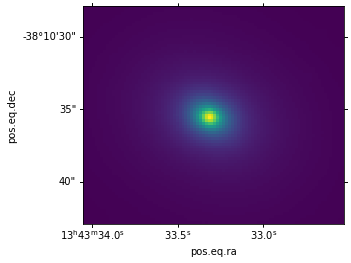

In [5]:
cube = Cube('/home/nicole/eso325/cutout_cube/cutout_eso325cube.fits')
cube.info()
image = cube.sum(axis=0)
image.plot(use_wcs=True)

Aqui, ao invés de criar um novo cubo binado, vamos extrair apenas os espectros que seriam obtidos do cubo binnado. A estratégia é: como queremos binnar em 0.6arcsec/px e temos 0.2arcsec/px do cubo original, precisamos somar a contribuição de 3px X 3px (0.6/0.2). Por esse motivo, nosso contador é incrementado de 3 em 3. Temos dois loops. Para cada valor de y, binnados todos os valores em x. Então saímos do loop em x, atualizamos y em 3, zeramos o contador de x e repitimos as iterações. Isso ocorre até percorremos todo o grid de pixels. O método de extração funciona da seguinte forma: A cada iteração é como se extraíssimos um subcubo de tamanho espacial 3X3. Feito isso, extríamos o espectro somando a contribuição dos nove pixels que formam esse subcubo. O método é a soma pois estamos querendo aumentar a razão sinal ruído.

x_px: é o posição x do pixel i.

y_px: é a posição y do pixel i.

x,y: são contadores.

Cada espectro binnado será salvo com o nome y_px X x_px.fits, que indica a posição do espectro neste novo grid binnado com 0.6''. 

In [6]:
x =0
y = 0
x_px = 0
y_px = 0
while y < 75:
    while x < 90:
        sub_cub = cube[:,0+y:1+y,0+x:1+x]
        spc = sub_cub.sum(axis=(1,2))
        spc.write('/home/nicole/eso325/espectros/%dx%d.fits'%(y_px,x_px))
        x_px = x_px + 1
        x = x +1
        
    y = y + 1
    x = 0
    x_px = 0
    y_px = y_px + 1

Abrindo o cubo, previamente cortado, no QFitsView vamos encontrar o pixel mais visível. Tendo então, neste ponto: (44,37), diminuindo -1 temos o espectro 36x43. 